<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-de-pacotes" data-toc-modified-id="Import-de-pacotes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import de pacotes</a></span></li><li><span><a href="#Leitura-do-dado-tratado" data-toc-modified-id="Leitura-do-dado-tratado-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Leitura do dado tratado</a></span></li><li><span><a href="#Modelo-naive" data-toc-modified-id="Modelo-naive-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modelo naive</a></span><ul class="toc-item"><li><span><a href="#Exemplo" data-toc-modified-id="Exemplo-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exemplo</a></span></li><li><span><a href="#Exemplo-iterativo-em-t" data-toc-modified-id="Exemplo-iterativo-em-t-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exemplo iterativo em t</a></span></li></ul></li></ul></div>

## Import de pacotes

In [1]:
import os,sys
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from math import factorial

from scipy import stats

import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
from ortools.linear_solver import pywraplp
from ortools.sat.python import cp_model

sys.path.append('../..')
from config import *
from utils import *

## Leitura do dado tratado

In [22]:
df = pd.read_pickle(os.path.join(TRTD_DATA_PATH,'eventos.pkl'))

In [23]:
df.head()

,data_idx,Prioridade,TotalViaturas,latitude,longitude,data,hora,p,Coordenadas,g,lat,lon,geometry,i,nome_bairro,t
1,2016-01-01 02:13:00,0,1,-22.876186,-43.675890,2016-01-01,2:13:05,1,POINT (-43.67589 -22.876186),1,-43.675890,-22.876186,POINT (-43.67589 -22.87619),149,Santa Cruz,5
3,2016-01-01 02:17:00,1,1,-22.906627,-43.293335,2016-01-01,2:17:06,2,POINT (-43.293335 -22.906627),1,-43.293335,-22.906627,POINT (-43.29333 -22.90663),66,Engenho De Dentro,5
6,2016-01-01 02:28:00,0,1,-23.012424,-43.541721,2016-01-01,2:28:08,1,POINT (-43.541721 -23.012424),1,-43.541721,-23.012424,POINT (-43.54172 -23.01242),152,Barra De Guaratiba,5
15,2016-01-01 02:51:00,0,2,-22.851838,-43.357152,2016-01-01,2:51:25,1,POINT (-43.357152 -22.851838),1,-43.357152,-22.851838,POINT (-43.35715 -22.85184),87,Honório Gurgel,6
20,2016-01-01 03:00:00,0,1,-22.824990,-43.392745,2016-01-01,3:00:47,1,POINT (-43.392745 -22.82499),1,-43.392745,-22.824990,POINT (-43.39274 -22.82499),107,Anchieta,7


## Modelo naive

In [5]:
def likelihood(d,mu):
    return sum([mu - y*np.log(mu) for y in d])

class NaiveModel:
    def __init__(self):
        self.lambda_ = None
        self.dist = None
        self.likelihood = None
    
    def fit(self,s):
        self.dist = s
        self.lambda_ = s.mean()
        
        self.likelihood = likelihood(self.dist,self.lambda_)
        
    def pdf(self):
        return np.array([stats.poisson(self.lambda_).pmf(x) for x in range(1,4)])

### Exemplo

In [86]:
model = NaiveModel()
d = calcular_distribuicao(df,38,1,144,1)
model.fit(d)
model.likelihood

230.05127625669888

0.1532567049808429


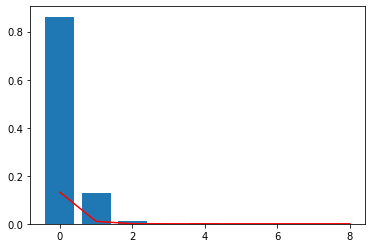

In [87]:
# estimador de maxima verossimilhanca
lambda_ = d.mean()
# distribuicao real
d = pd.Series(d).value_counts() / len(d)
# distribuicao teorica
teor_d = np.array([stats.poisson(lambda_).pmf(x) for x in range(1,10)])

print(lambda_)
plt.bar(x=d.index,height=d.values)
plt.plot(teor_d,color='red')
plt.show()

### Exemplo iterativo em t

In [89]:
for it in range(1,49):
    model = NaiveModel()
    d = calcular_distribuicao(df,it,1,144,1)
    model.fit(d)
    print('t: {} - Likelihood: {}'.format(it,model.likelihood))

t: 1 - Likelihood: 226.2747833730556
t: 2 - Likelihood: 134.92973798382263
t: 3 - Likelihood: 160.15343935011
t: 4 - Likelihood: 181.00969024025886
t: 5 - Likelihood: 140.17013172836567
t: 6 - Likelihood: 155.2952294150542
t: 7 - Likelihood: 152.83302997443388
t: 8 - Likelihood: 121.34181392265154
t: 9 - Likelihood: 97.91073018083341
t: 10 - Likelihood: 94.80998755492996
t: 11 - Likelihood: 88.47604815334338
t: 12 - Likelihood: 94.80998755493009
t: 13 - Likelihood: 94.80998755493049
t: 14 - Likelihood: 112.82078097898942
t: 15 - Likelihood: 75.21572214504917
t: 16 - Likelihood: 88.47604815334338
t: 17 - Likelihood: 109.91296617580794
t: 18 - Likelihood: 150.34810130413038
t: 19 - Likelihood: 140.17013172836587
t: 20 - Likelihood: 206.59487202404236
t: 21 - Likelihood: 224.36738678422932
t: 22 - Likelihood: 244.66910805959216
t: 23 - Likelihood: 261.9246107027817
t: 24 - Likelihood: 248.2072125797163
t: 25 - Likelihood: 255.15104372758532
t: 26 - Likelihood: 273.3892599611369
t: 27 - Li